In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class StaticMethod():
    
    def __init__(self,p,r):
        self.periodicity = p # Periodicity
        self.seasonal_cycles = r # Number of seasonal cycles
        self.time_periods = ['t'] # Time Period (t)
        self.demand_data = ['Dt'] # Demand Data (Dt)
        self.estimated_level = 'unknown' # Level estimated from Linear Regression; initially "unknown"
        self.estimated_trend = 'unknown' # Trend estimated from Linear Regression; initially "unknown"
        self.deseasonalized_demands = [] # Deseasonalized Demand Data (DDt)
        self.seasonal_factors = [] # Seasonal Factors (SSt)
        self.seasonal_factor_for_given_period = [] # Seasonal Factors (Si)
        self.forecast_for_next_p_periods = [] # Forecast for next "p" periods
        
    def add_time_period(self): # Enables the user to add data of Time Period
        self.time_periods = self.time_periods+list(map(int,input().split()))
        
    def add_demand_data(self): # Enables the user to add Demand Data
        self.demand_data = self.demand_data+list(map(float,input().split()))
        
    def perform_analysis(self): # Performs the remaining Static Method Time-Series Forecasting Method
        
        p = self.periodicity # Period
        
        # If p is even
        if(p%2 == 0):
            Dt = self.demand_data # Demand Data
            t_initial = int(1 + (p/2)) # Initial period "t" for Deseasonalized demand
            t_final = int(len(self.time_periods) - 1 - (p/2)) # Final period "t" for Deseasonalized demand
            DDt = ['DDt'] # Initiating Deseasonalized Demand
            DDt = DDt+['unknown' for i in range(len(self.demand_data)-1)] # Deseasonalized Demand
            
            # Calculating Deseasonalized Demand from Demand Data
            for i in range(t_initial,t_final+1):
                DDt[i] = (Dt[int(i-(p/2))] + Dt[int(i+(p/2))] + 2*(sum(Dt[int(i+1-(p/2)):int(i+(p/2))])))/(2*p)
            
            self.deseasonalized_demands = DDt # Deseasonalized Demand
            
            # Running Linear Regression for finding Level & Trend
            
            sum_t = sum(range(t_initial,t_final+1)) # Sum of time periods
            sum_DDt = sum(DDt[t_initial:t_final+1]) # Sum of Deseasonalized Demands
            
            mean_t = sum_t/(len(range(t_initial,t_final+1))) # Mean of time periods
            mean_DDt = sum_DDt/len(DDt[t_initial:t_final+1]) # Mean of Deseasonalized Demand
            
            diff_t = [i-mean_t for i in range(t_initial,t_final+1)] # Difference of time periods & their mean
            diff_DDt = [DDt[i]-mean_DDt for i in range(t_initial,t_final+1)] # Difference of Deseasonalized Demand & their mean
            
            sos_t = sum([i**2 for i in diff_t]) # Sum of squares of Differences of time periods & their mean
            
            # Sum of products of 'Differences of time periods & their mean' 
            # and 'Difference of Deseasonalized Demand & their mean'
            sop = sum([diff_t[i]*diff_DDt[i] for i in range(len(diff_t))])
            
            # Slope of the Regression model between DDt & t
            slope = sop/sos_t
            self.estimated_trend = round(slope,0)
            
            # Intercept of the Regression model between DDt & t
            intercept = mean_DDt - slope*mean_t
            self.estimated_level = round(intercept,0)
            
            # Results of the Regression Model
            print('Linear Regression of Deseasonalized Demand & Time Period')
            print('DDt = {}*t + {}'.format(round(slope,0),round(intercept,0)))
            print('where -')
            print('Level = ',round(intercept,0))
            print('Trend = ',round(slope,0))
            print()
            
            # Finding "unknown" values in Deseasonalized Demand
            for i in range(len(DDt)):
                if(DDt[i] == 'unknown'):
                    DDt[i] = round(slope,0)*self.time_periods[i]+round(intercept,0)
                else:
                    pass
            
            # Estimating Seasonal Factors SSt
            SSt = ['SSt']
            SSt = SSt + list(['unknown' for i in range(len(Dt)-1)])
            
            for i in range(1,len(Dt)):
                if(DDt[i] != 0):
                    SSt[i] = round(Dt[i]/DDt[i],2)
                else:
                    pass
            self.seasonal_factors = SSt
            
            # Estimating Seasonal Factors based on seasonal cycles & periods
            Si = ['Si']
            Si = Si + ['unknown' for i in range(p)]
            for i in range(1,p+1):
                s = 0
                for j in range(self.seasonal_cycles):
                    s = s + SSt[j*p+i]
                Si[i] = round(s/self.seasonal_cycles,2)
            
            self.seasonal_factor_for_given_period = Si
            
            # Predicting Forecast for next "p" periods after final t periods
            F = {}
            for i in range(1,p+1):
                F['F'+str(self.time_periods[-1]+i)] = round((round(intercept,0)+round(slope,0)*(self.time_periods[-1]+i))*Si[i],0)
                
            self.forecast_for_next_p_periods = F
            print()
            
            # Tabulation
            df = pd.DataFrame({'Time Period':self.time_periods,
                               'Actual Demand':self.demand_data,
                               'Deseasonalized Demand':self.deseasonalized_demands,
                               'Seasonal Factors':self.seasonal_factors})
            df.set_index('Time Period',inplace=True)
            print(df)
            print()
            # Plotting Demand VS Time Period
            
            y1 = np.array(Dt[1:])
            y2 = np.array(DDt[1:])
            x = np.array(self.time_periods[1:])
            plt.plot(x,y1,label='Actual Demand')
            plt.plot(x,y2,label='Deseasonalized Demand')
            plt.xlabel('Period'),plt.ylabel('Demand'),plt.title('Demand - Time Period Graphic')
            plt.xlim([self.time_periods[1],self.time_periods[-1]]),plt.legend()
            print()
            print('Analysis Complete')
            
        elif(p%2 != 0):
            
            Dt = self.demand_data # Demand Data
            t_initial = int(1 + ((p-1)/2)) # Initial period "t" for Deseasonalized demand
            t_final = int(len(self.time_periods) - 1 - ((p-1)/2)) # Final period "t" for Deseasonalized demand
            DDt = ['DDt'] # Initiating Deseasonalized Demand
            DDt = DDt+['unknown' for i in range(len(Dt)-1)] # Deseasonalized Demand
            
            # Calculating Deseasonalized Demand from Demand Data
            for i in range(t_initial,t_final+1):
                DDt[i] = sum(Dt[t_initial:t_final+1])/p
            
            self.deseasonalized_demands = DDt # Deseasonalized Demand
            
            # Running Linear Regression for finding Level & Trend
            
            sum_t = sum(range(t_initial,t_final+1)) # Sum of time periods
            sum_DDt = sum(DDt[t_initial:t_final+1]) # Sum of Deseasonalized Demands
            
            mean_t = sum_t/(len(range(t_initial,t_final+1))) # Mean of time periods
            mean_DDt = sum_DDt/len(DDt[t_initial:t_final+1]) # Mean of Deseasonalized Demand
            
            diff_t = [i-mean_t for i in range(t_initial,t_final+1)] # Difference of time periods & their mean
            diff_DDt = [DDt[i]-mean_DDt for i in range(t_initial,t_final+1)] # Difference of Deseasonalized Demand & their mean
            
            sos_t = sum([i**2 for i in diff_t]) # Sum of squares of Differences of time periods & their mean
            
            # Sum of products of 'Differences of time periods & their mean' 
            # and 'Difference of Deseasonalized Demand & their mean'
            sop = sum([diff_t[i]*diff_DDt[i] for i in range(len(diff_t))])
            
            # Slope of the Regression model between DDt & t
            slope = sop/sos_t
            self.estimated_trend = round(slope,0)
            
            # Intercept of the Regression model between DDt & t
            intercept = mean_DDt - slope*mean_t
            self.estimated_level = round(intercept,0)
            
            # Results of the Regression Model
            print('Linear Regression of Deseasonalized Demand & Time Period')
            print('DDt = {}*t + {}'.format(round(slope,0),round(intercept,0)))
            print('where -')
            print('Level = ',round(intercept,0))
            print('Trend = ',round(slope,0))
            print()
            
            # Finding "unknown" values in Deseasonalized Demand
            for i in range(len(DDt)):
                if(DDt[i] == 'unknown'):
                    DDt[i] = round(slope,0)*self.time_periods[i]+round(intercept,0)
                else:
                    pass
            
            # Estimating Seasonal Factors SSt
            SSt = ['SSt']
            SSt = SSt + list(['unknown' for i in range(len(Dt)-1)])
            
            for i in range(1,len(Dt)):
                if(DDt[i] != 0):
                    SSt[i] = round(Dt[i]/DDt[i],2)
                else:
                    pass
            self.seasonal_factors = SSt
            
            # Estimating Seasonal Factors based on seasonal cycles & periods
            Si = ['Si']
            Si = Si + ['unknown' for i in range(p)]
            for i in range(1,p+1):
                s = 0
                for j in range(self.seasonal_cycles):
                    s = s + SSt[j*p+i]
                Si[i] = round(s/self.seasonal_cycles,2)
            
            self.seasonal_factor_for_given_period = Si
            
            # Predicting Forecast for next "p" periods after final t periods
            F = {}
            for i in range(1,p+1):
                F['F'+str(self.time_periods[-1]+i)] = round((round(intercept,0)+round(slope,0)*(self.time_periods[-1]+i))*Si[i],0)
                
            self.forecast_for_next_p_periods = F
            print()
            # Tabulation
            df = pd.DataFrame({'Time Period':self.time_periods,
                               'Actual Demand':self.demand_data,
                               'Deseasonalized Demand':self.deseasonalized_demands,
                               'Seasonal Factors':self.seasonal_factors})
            df.set_index('Time Period',inplace=True)
            print(df)
            print()
            # Plotting Demand VS Time Period
            
            y1 = np.array(Dt[1:])
            y2 = np.array(DDt[1:])
            x = np.array(self.time_periods[1:])
            plt.plot(x,y1,label='Actual Demand')
            plt.plot(x,y2,label='Deseasonalized Demand')
            plt.xlabel('Period'),plt.ylabel('Demand'),plt.title('Demand - Time Period Graphic')
            plt.xlim([self.time_periods[1],self.time_periods[-1]]),plt.legend()
            print()
            print('Analysis Complete')
            

------------------------

# Examples

<b>Example 1 :</b>
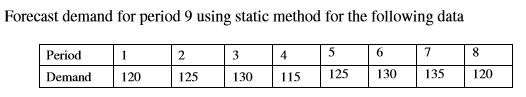

In [3]:
s1 = StaticMethod(4,2) # Periodicity = 4; Seasonal cycles = 2 i.e. 2 cycles with 4 periods in each cycle

In [4]:
s1.add_time_period()

1 2 3 4 5 6 7 8


In [5]:
s1.add_demand_data()

120 125 130 115 125 130 135 120


In [6]:
s1.periodicity

4

In [7]:
s1.seasonal_cycles

2

In [8]:
s1.time_periods

['t', 1, 2, 3, 4, 5, 6, 7, 8]

In [9]:
s1.demand_data

['Dt', 120.0, 125.0, 130.0, 115.0, 125.0, 130.0, 135.0, 120.0]

In [10]:
s1.deseasonalized_demands

[]

In [11]:
s1.estimated_level

'unknown'

In [12]:
s1.estimated_trend

'unknown'

In [13]:
s1.seasonal_factors

[]

In [14]:
s1.seasonal_factor_for_given_period

[]

In [15]:
s1.forecast_for_next_p_periods

[]

Linear Regression of Deseasonalized Demand & Time Period
DDt = 1.0*t + 119.0
where -
Level =  119.0
Trend =  1.0


            Actual Demand Deseasonalized Demand Seasonal Factors
Time Period                                                     
t                      Dt                   DDt              SSt
1                     120                   120                1
2                     125                   121             1.03
3                     130               123.125             1.06
4                     115               124.375             0.92
5                     125               125.625                1
6                     130               126.875             1.02
7                     135                   126             1.07
8                     120                   127             0.94


Analysis Complete


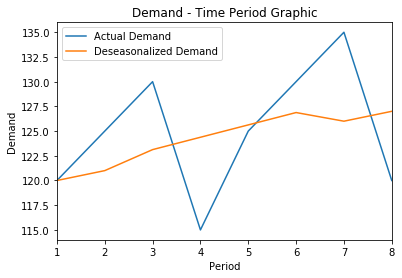

In [16]:
s1.perform_analysis()

In [17]:
s1.deseasonalized_demands

['DDt', 120.0, 121.0, 123.125, 124.375, 125.625, 126.875, 126.0, 127.0]

In [18]:
s1.estimated_level

119.0

In [19]:
s1.estimated_trend

1.0

In [20]:
s1.seasonal_factors

['SSt', 1.0, 1.03, 1.06, 0.92, 1.0, 1.02, 1.07, 0.94]

In [21]:
s1.seasonal_factor_for_given_period

['Si', 1.0, 1.02, 1.06, 0.93]

In [22]:
s1.forecast_for_next_p_periods

{'F9': 128.0, 'F10': 132.0, 'F11': 138.0, 'F12': 122.0}

-------------------------------

<b>Example 2 :</b>
Forecast demand for the next 4 quarters using Static Method for the following Data:
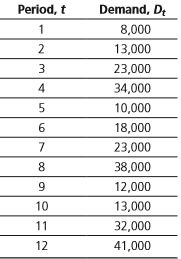

In [23]:
s2 = StaticMethod(4,3) # Periodicity = 4; Seasonal cycles =  i.e. 3 cycles with 4 periods in each cycle

In [24]:
s2.add_time_period()

1 2 3 4 5 6 7 8 9 10 11 12


In [25]:
s2.add_demand_data()

8000 13000 23000 34000 10000 18000 23000 38000 12000 13000 32000 41000


In [26]:
s2.periodicity

4

In [27]:
s2.seasonal_cycles

3

In [28]:
s2.time_periods

['t', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [29]:
s2.demand_data

['Dt',
 8000.0,
 13000.0,
 23000.0,
 34000.0,
 10000.0,
 18000.0,
 23000.0,
 38000.0,
 12000.0,
 13000.0,
 32000.0,
 41000.0]

Linear Regression of Deseasonalized Demand & Time Period
DDt = 524.0*t + 18439.0
where -
Level =  18439.0
Trend =  524.0


            Actual Demand Deseasonalized Demand Seasonal Factors
Time Period                                                     
t                      Dt                   DDt              SSt
1                    8000                 18963             0.42
2                   13000                 19487             0.67
3                   23000                 19750             1.16
4                   34000                 20625             1.65
5                   10000                 21250             0.47
6                   18000                 21750             0.83
7                   23000                 22500             1.02
8                   38000                 22125             1.72
9                   12000                 22625             0.53
10                  13000                 24125             0.54
11                  32000       

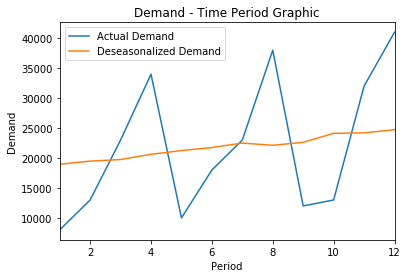

In [30]:
s2.perform_analysis()

In [31]:
s2.deseasonalized_demands

['DDt',
 18963.0,
 19487.0,
 19750.0,
 20625.0,
 21250.0,
 21750.0,
 22500.0,
 22125.0,
 22625.0,
 24125.0,
 24203.0,
 24727.0]

In [32]:
s2.estimated_level

18439.0

In [33]:
s2.estimated_trend

524.0

In [34]:
s2.seasonal_factors

['SSt', 0.42, 0.67, 1.16, 1.65, 0.47, 0.83, 1.02, 1.72, 0.53, 0.54, 1.32, 1.66]

In [35]:
s2.seasonal_factor_for_given_period

['Si', 0.47, 0.68, 1.17, 1.68]

In [36]:
s2.forecast_for_next_p_periods

{'F13': 11868.0, 'F14': 17527.0, 'F15': 30770.0, 'F16': 45063.0}